<a href="https://colab.research.google.com/github/Y-B-Class-Projects/neural-networks-connect-four-game/blob/main/Neural_networks_Exercise_6_Connect_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Four Game with Reinforcement Learning


> Written by **Baruch Baksht** and **Israel Rolnik**
>
> Lecturer: **Professor Avi Rosenfeld**


In this project we built a smart agent that plays the "Connect Four" game.
We tested the agent's performance against two agents:

* Randomly agent
* Heuristic agent


### Fields and methods for the game

In [11]:
import copy
import random
import concurrent.futures
from pyparsing import col

VICTORY = 10 ** 20  # The value of a winning board (for max)
LOSS = -VICTORY  # The value of a losing board (for max)
TIE = 0  # The value of a tie
SIZE = 4  # the length of winning seq.
COMPUTER = SIZE + 1  # Marks the computer's cells on the board
HUMAN = 1  # Marks the human's cells on the board
random.seed()

rows = 6
columns = 7


class game:
    board = []
    size = rows * columns
    playTurn = HUMAN

    '''
    The state of the game is represented by a list of 4 items:
        0. The game board - a matrix (list of lists) of ints. Empty cells = 0,
        the comp's cells = COMPUTER and the human's = HUMAN
        1. The heuristic value of the state.
        2. Whose turn is it: HUMAN or COMPUTER
        3. Number of empty cells
    '''


def create(s):
    # Returns an empty board. The human plays first.
    # create the board
    s.board = []
    for i in range(rows):
        s.board = s.board + [columns * [0]]

    s.playTurn = HUMAN
    s.size = rows * columns
    s.val = 0.00001


def cpy(s1):
    # construct a parent DataFrame instance
    s2 = game()
    s2.playTurn = s1.playTurn
    s2.size = s1.size
    s2.board = copy.deepcopy(s1.board)
    # print("board ", s2.board)
    return s2


def value(s):
    # Returns the heuristic value of s
    dr = [-SIZE + 1, -SIZE + 1, 0, SIZE - 1]  # the next lines compute the heuristic val.
    dc = [0, SIZE - 1, SIZE - 1, SIZE - 1]
    val = 0.00001
    for row in range(rows):
        for col in range(columns):
            for i in range(len(dr)):
                t = checkSeq(s, row, col, row + dr[i], col + dc[i])
                if t in [LOSS, VICTORY]:
                    val = t
                    break
                else:
                    val += t
    if s.size == 0 and val not in [LOSS, VICTORY]:
        val = TIE
    return val


def checkSeq(s, r1, c1, r2, c2):
    # r1, c1 are in the board. if r2,c2 not on board returns 0.
    # Checks the seq. from r1,c1 to r2,c2. If all X returns VICTORY. If all O returns LOSS.
    # If empty returns 0.00001. If no Os returns 1. If no Xs returns -1.
    if r2 < 0 or c2 < 0 or r2 >= rows or c2 >= columns:
        return 0  # r2, c2 are illegal

    dr = (r2 - r1) // (SIZE - 1)  # the horizontal step from cell to cell
    dc = (c2 - c1) // (SIZE - 1)  # the vertical step from cell to cell

    sum = 0

    for i in range(SIZE):  # summing the values in the seq.
        sum += s.board[r1 + i * dr][c1 + i * dc]

    if sum == COMPUTER * SIZE:
        return VICTORY

    elif sum == HUMAN * SIZE:
        return LOSS
    elif sum > 0 and sum < COMPUTER:
        return -1

    elif sum > 0 and sum % COMPUTER == 0:
        return 1
    return 0.00001  # not 0 because TIE is 0


def printState(s):
    # Prints the board. The empty cells are printed as numbers = the cells name(for input)
    # If the game ended prints who won.
    for r in range(rows):
        print("\n|", end="")
        for c in range(columns):
            if s.board[r][c] == COMPUTER:
                print("X|", end="")
            elif s.board[r][c] == HUMAN:
                print("O|", end="")
            else:
                print(" |", end="")
    print()

    for i in range(columns):  # For numbers on the bottom
        print(" ", i, sep="", end="")

    print()

    val = value(s)

    if val == VICTORY:
        print("I won!")
    elif val == LOSS:
        print("You beat me!")
    elif val == TIE:
        print("It's a TIE")


def isFinished(s):
    # Seturns True iff the game ended
    return value(s) in [LOSS, VICTORY, TIE] or s.size == 0


def isHumTurn(s):
    # Returns True iff it is the human's turn to play
    return s.playTurn == HUMAN


def decideWhoIsFirst(s):
    # The user decides who plays first
    if int(input("Who plays first? 1-MC / anything else-you : ")) == 1:
        s.playTurn = COMPUTER
    else:
        s.playTurn = HUMAN
    return s.playTurn


def makeMove(s, c):
    # Puts mark (for humaמ or computer) in col. c
    # and switches turns.
    # Assumes the move is legal.
    r = 0
    while r < rows and s.board[r][c] == 0:
        r += 1

    s.board[r - 1][c] = s.playTurn  # marks the board
    s.size -= 1  # one less empty cell
    if (s.playTurn == COMPUTER):
        s.playTurn = HUMAN
    else:
        s.playTurn = COMPUTER


def inputMove(s):
    # Reads, enforces legality and executes the user's move.
    flag = True
    while flag:
        printState(s)
        c = int(input("Enter your next move: "))
        if c < 0 or c >= columns or s.board[0][c] != 0:
            print("Illegal move.")
            break
        else:
            flag = False
            makeMove(s, c)

The code of the "Human" agents

In [ ]:
def inputRandom(s):
    # See if the agent can win block one move ahead
    for i in range(0, columns):  # this simple agent always plays min
        tmp = cpy(s)
        makeMove(tmp, i)
        if (value(tmp) == LOSS and s.board[0][i] == 0):  # if the agent should win
            makeMove(s, i)
            return
    # If no obvious move, then move random
    flag = True
    while flag:
        c = random.randrange(0, columns)
        if c < 0 or c >= columns or s.board[0][c] != 0:
            # print("Illegal move.")
            # printState(s)
            a = 0
        else:
            flag = False
            makeMove(s, c)


def inputHeuristic(s):
    # See if the agent can win or get more than one in a row
    temp = 1000
    tmp_col = 0
    for i in range(0, columns):  # this simple agent always plays min
        tmp = cpy(s)
        makeMove(tmp, i)
        if (value(tmp) < temp and s.board[0][i] == 0):  # so a "loss" is a win for this side
            tmp_col = i
            temp = value(tmp)
    makeMove(s, tmp_col)

### Our smart agent

The agent checks which column to select by the following algorithm:
The agent selects a particular column and does a simulation of running his turn in that column and then does 50 simulations on the board after that turn with 50 random games. The agent then checks the percentage of wins in those 50 games.
The agent applies this algorithm to each and every column and at the end plays with the same column that received the highest win percentage.

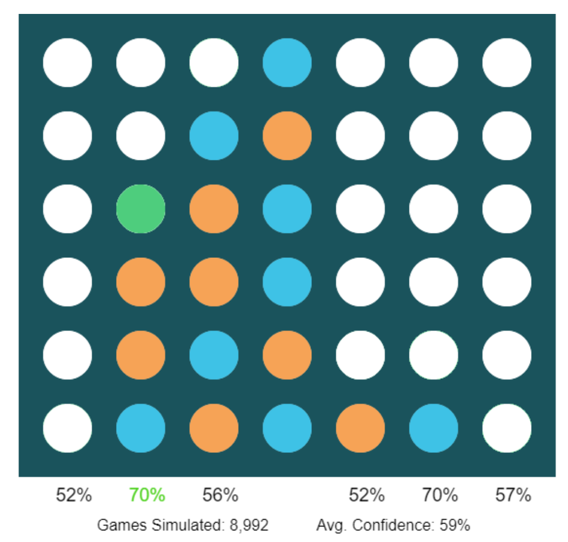




Since it is possible to do all the simulations of the columns and all the 50 random games in parallel we have added multithreading to our code.

In [12]:
def inputMC(s):  
    with concurrent.futures.ThreadPoolExecutor() as executor:
      futures = [executor.submit(column_play, s, i) for i in range(0,columns)]  #futures is list that contains threads for each column.
    percentage = [f.result() for f in futures]  #percentage is list that contains for each column the percentage of wins (from the simulations).
    makeMove(s, percentage.index(max(percentage)))


def column_play(game, n): #Run the 50 games simultaneously for a particular column selection.
    num_games = 50
    victory_count = 0
    from_game = cpy(game)
    makeMove(from_game, n)
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(play_random_game,from_game) for i in range(0, num_games)]  #futures is list that contains threads for each game.

    res = ([1 if f.result() else 0 for f in futures]) #res is list that contains the results for each game.
    victory_count = sum(res)
    return victory_count / num_games  #Returns the percentage of wins.


def play_random_game(from_game):  #A function that plays a random game to the end and returns True if the computer won otherwise False
    tmp = cpy(from_game)
    while not isFinished(tmp):
        inputRandom(tmp)

    return value(tmp) == VICTORY

The run_game(hum_func) function runs the game with our smart agent VS one of the "Human" agents (random / heuristic).

In [13]:
def run_game(hum_func):
  board= game()
  create(board)
  print("Initial Game")
  #printState(board)
  decideWhoIsFirst(board)
  comp_count = 0
  for i in range(0,100):#This loops takes about 15 seconds on my computer
      while not isFinished(board):
          if isHumTurn(board): #The simple agent plays "Human"
              hum_func(board)
          else:
              inputMC(board) #The MC agent plays "Computer"
          #printState(board)
      if value(board)==10**20: #the MC Agent won
          comp_count+=1
      print("Game #", i+1, ": Computer won ",int(comp_count/(i+1)*100) , "% of the games, starting another game...", sep="")
      create(board)
  print("The MC agent beat the baseline:", comp_count, " out of ", i+1)

### Run 100 games with our smart agent VS the Random agent

In [10]:
run_game(inputRandom)

Initial Game
Who plays first? 1-MC / anything else-you : 1
Game #1: Computer won 100% of the games, starting another game...
Game #2: Computer won 100% of the games, starting another game...
Game #3: Computer won 100% of the games, starting another game...
Game #4: Computer won 100% of the games, starting another game...
Game #5: Computer won 100% of the games, starting another game...
Game #6: Computer won 100% of the games, starting another game...
Game #7: Computer won 100% of the games, starting another game...
Game #8: Computer won 100% of the games, starting another game...
Game #9: Computer won 100% of the games, starting another game...
Game #10: Computer won 100% of the games, starting another game...
Game #11: Computer won 100% of the games, starting another game...
Game #12: Computer won 100% of the games, starting another game...
Game #13: Computer won 100% of the games, starting another game...
Game #14: Computer won 100% of the games, starting another game...
Game #15: Co

###Result: Our smart agent won **100%** of the games.

### Run 100 games with our smart agent VS the Heuristic agent

In [14]:
run_game(inputHeuristic)

Initial Game
Who plays first? 1-MC / anything else-you : 1
Game #1: Computer won 100% of the games, starting another game...
Game #2: Computer won 100% of the games, starting another game...
Game #3: Computer won 100% of the games, starting another game...
Game #4: Computer won 100% of the games, starting another game...
Game #5: Computer won 100% of the games, starting another game...
Game #6: Computer won 100% of the games, starting another game...
Game #7: Computer won 100% of the games, starting another game...
Game #8: Computer won 100% of the games, starting another game...
Game #9: Computer won 100% of the games, starting another game...
Game #10: Computer won 100% of the games, starting another game...
Game #11: Computer won 100% of the games, starting another game...
Game #12: Computer won 100% of the games, starting another game...
Game #13: Computer won 100% of the games, starting another game...
Game #14: Computer won 100% of the games, starting another game...
Game #15: Co

###Result: Our smart agent won **99%** of the games.